항공기 또는 우주선 등에 의하여 국내․외 항공 화물을 운송하는 산업활동을 말한다. 운전자가 딸린 항공기 임대활동도 포함한다.

<예시>
·항공 화물 부정기 운송
·항공 화물 정기운송
·우주선 운행
·화물 운송 항공기 임대(조종사 딸린)
·각종 위성 및 우주선 발사업 운영
·화물 및 여객의 우주 운송

<제외>
·항공기를 이용하여 직접 특정 용역사업을 수행할 경우에는 그 용역사업 내용에 따라 각각 분류
·소화물 택배 운송업(49401), 늘찬 배달업(49402)

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/정기 항공 운송업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115914 entries, 0 to 115913
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      115914 non-null  object
 1   CARD_SIDO_NM  115914 non-null  object
 2   CARD_CCG_NM   115914 non-null  object
 3   STD_CLSS_NM   115914 non-null  object
 4   HOM_SIDO_NM   115914 non-null  object
 5   HOM_CCG_NM    115248 non-null  object
 6   AGE           115914 non-null  object
 7   SEX_CTGO_CD   115914 non-null  int64 
 8   FLC           115914 non-null  int64 
 9   CSTMR_CNT     115914 non-null  int64 
 10  AMT           115914 non-null  int64 
 11  CNT           115914 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 11.5+ MB
None


In [4]:
#안쓰는 컬럼 드랍
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [5]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115914 entries, 0 to 115913
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      115914 non-null  object
 1   CARD_SIDO_NM  115914 non-null  object
 2   HOM_SIDO_NM   115914 non-null  object
 3   AGE           115914 non-null  object
 4   SEX_CTGO_CD   115914 non-null  int64 
 5   FLC           115914 non-null  int64 
 6   CSTMR_CNT     115914 non-null  int64 
 7   AMT           115914 non-null  int64 
 8   CNT           115914 non-null  int64 
 9   year          115914 non-null  int64 
 10  month         115914 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 10.6+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           부산          강원  30s            1    2          3   
1   201901           부산          강원  20s            2    1          7   
2   201901           부산          강원  30s            2  

In [7]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['부산' '서울' '인천' '전북' '제주' '충남']
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


CARD_SIDO_NM
충남        71879000
인천      6412077691
전북     26745030891
제주     44555678462
부산     52131841832
서울    451182181903
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

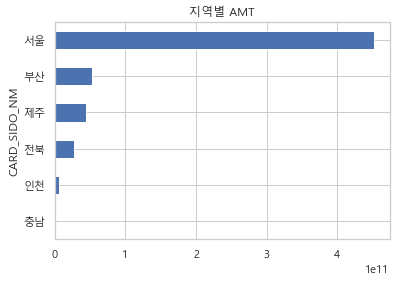

In [8]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    48202786679
201902    42774554165
201903    44892792670
201904    43295384568
201905    42743798988
201906    46495097937
201907    52678856812
201908    38312925332
201909    35215409917
201910    38830262941
201911    38117944648
201912    54658061098
202001    41662540376
202002     9903281616
202003     3314992032
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

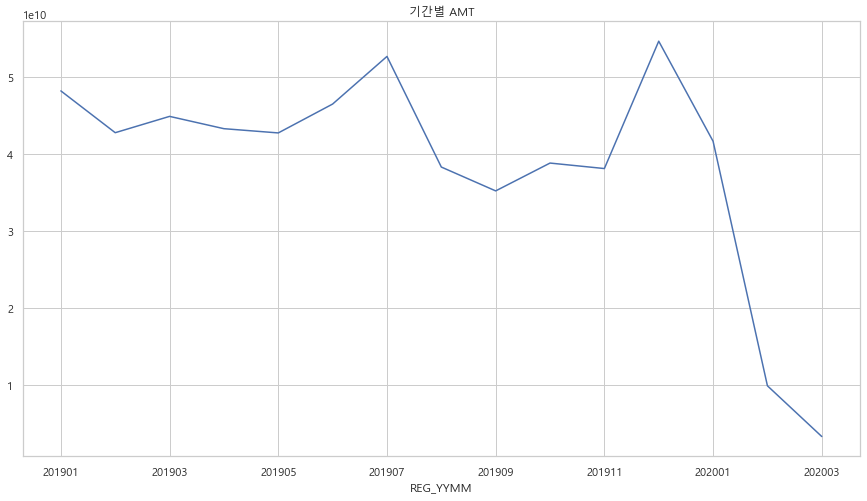

In [9]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

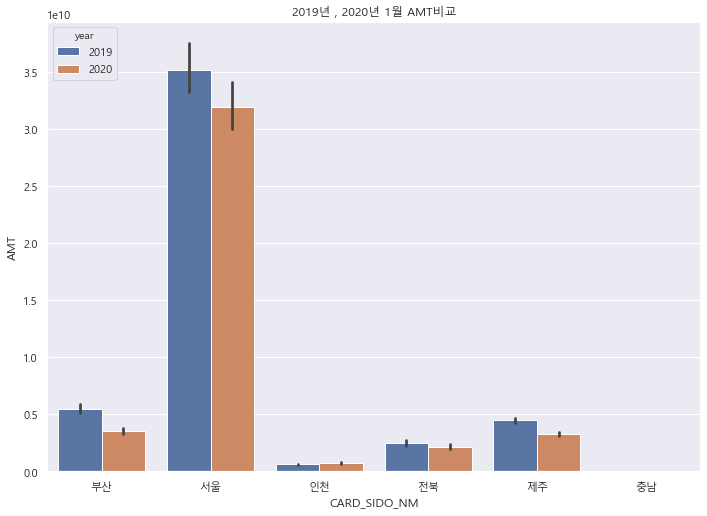

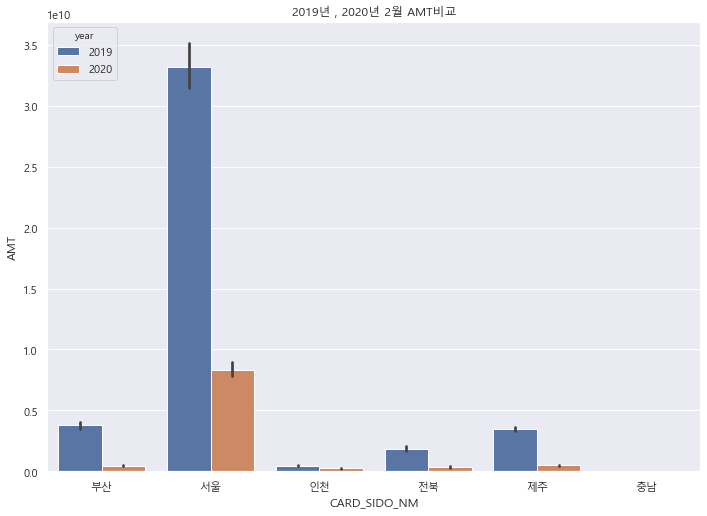

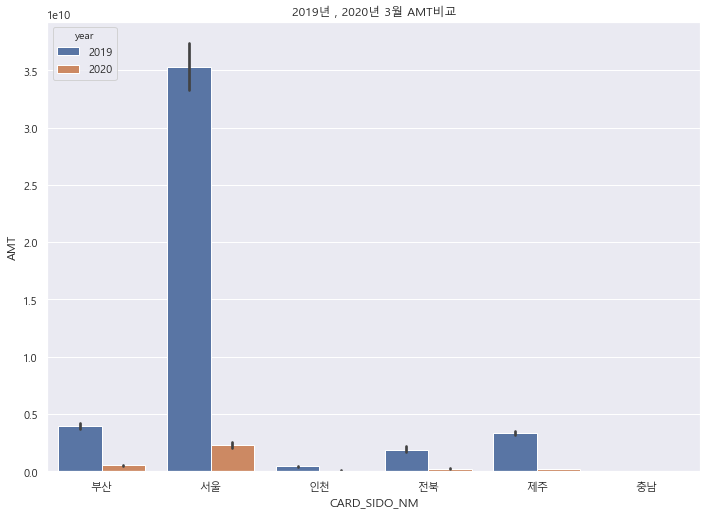

In [10]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

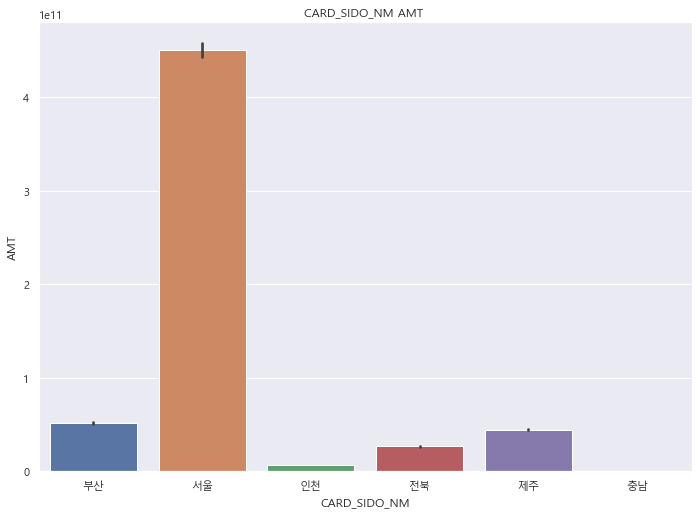

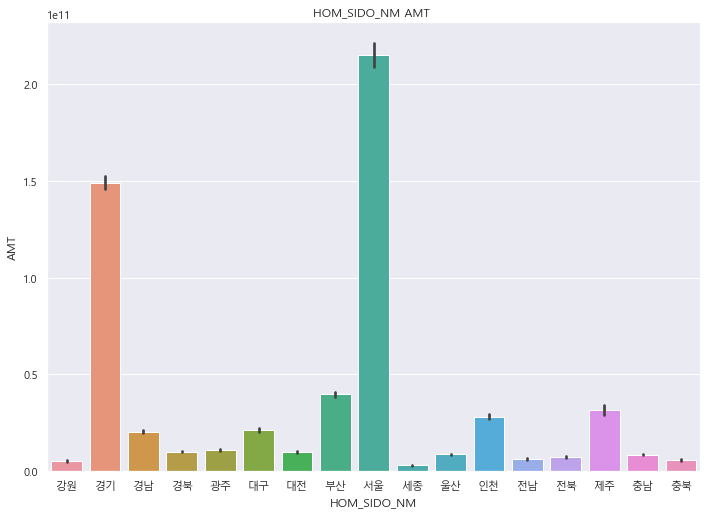

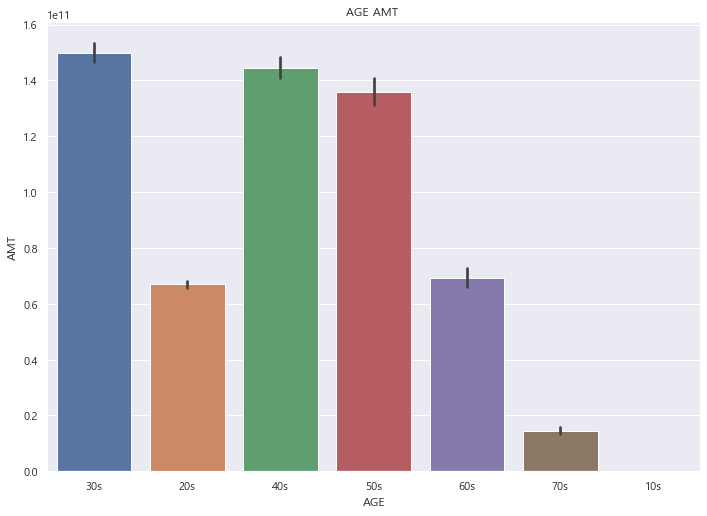

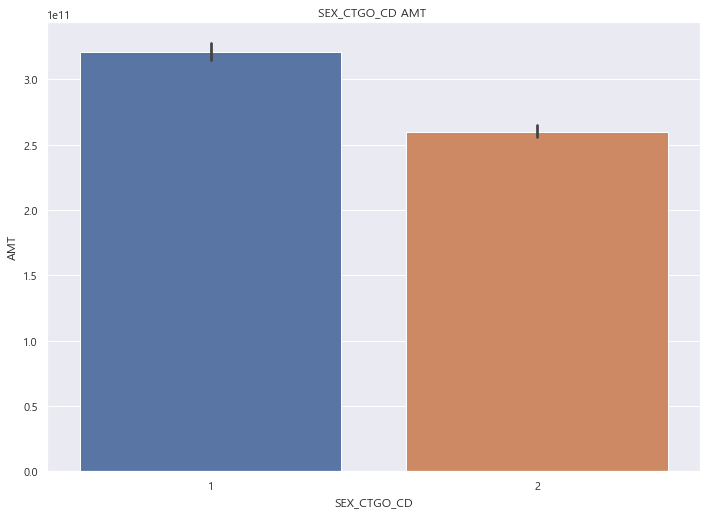

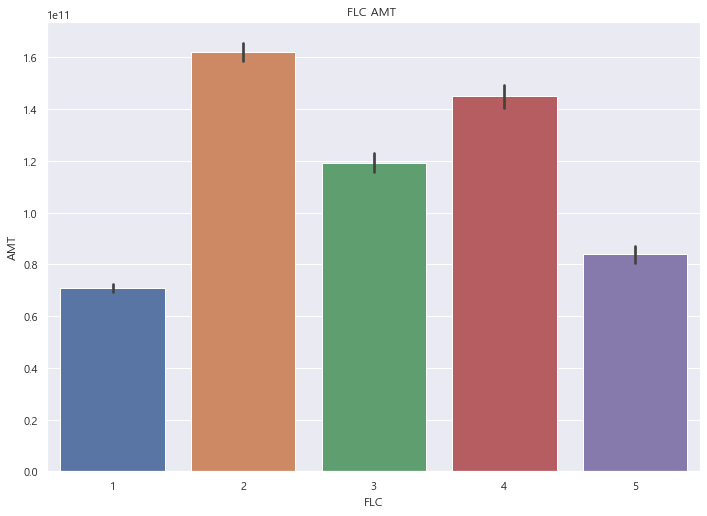

In [11]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()